In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../experiments/sw-data/amd.csv')
# df = pd.read_csv('../experiments/sw-data/sigmax.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
10,ANTLR4,NaN,False,1,7271551,134217732,87258604,11.804900,1.136966e+07
3,RapidJSON,DOM,False,1,7271551,134217732,87258604,0.608708,2.204961e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,87258604,0.556369,2.412387e+08
9,Custom,whitespaces,False,1,7271551,134217732,87258604,0.377725,3.553319e+08
5,RapidJSON,SAX,False,1,7271551,134217732,87258604,0.302466,4.437449e+08
0,simdjson,DOM,False,1,7271551,134217732,87258604,0.279901,4.795186e+08
6,RapidJSON,SAX,True,1,7271551,134217732,87258604,0.263764,5.088554e+08
1,simdjson,DOM,True,1,7271551,134217732,87258604,0.248761,5.395449e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,87258604,0.238665,5.623687e+08
12,Boost Spirit.X3,whitespace,False,1,7271551,134217732,87258604,0.113071,1.187022e+09


In [3]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 87258604            0.011370
                2          134217737 103798904           0.010562
                4          134217740 128303440           0.010182
                8          134217764 157861596           0.009428
                16         134217768 186337836           0.009132
                32         134217827 208512692           0.008852
                64         134217903 223034756           0.008721
                128        134217816 231471012           0.008679
                256        134218013 236026080           0.008597
                512        134217919 238415680           0.008625
                1024       134218095 239631092           0.008659
Boost Spirit.X3 1          134217732 87258604            1.246925
                2          134217737 103798904           0.903817
                4          134217740 128303440           0.799448
                8          134217764 157861596           0.704296
                16         134217768 186337836           0.674780
                32         134217827 208512692           0.634414
                64         134217903 223034756           0.625118
                128        134217816 231471012           0.619277
                256        134218013 236026080           0.611163
                512        134217919 238415680           0.608281
                1024       134218095 239631092           0.606932
Custom          1          134217732 87258604            2.222950
                2          134217737 103798904           1.800630
                4          134217740 128303440           1.366966
                8          134217764 157861596           1.141269
                16         134217768 186337836           1.014166
                32         134217827 208512692           0.928361
                64         134217903 223034756           0.881458
                128        134217816 231471012           0.863882
                256        134218013 236026080           0.844091
                512        134217919 238415680           0.837940
                1024       134218095 239631092           0.835162
RapidJSON       1          134217732 87258604            0.508855
                2          134217737 103798904           0.479048
                4          134217740 128303440           0.462743
                8          134217764 157861596           0.456525
                16         134217768 186337836           0.457055
                32         134217827 208512692           0.457527
                64         134217903 223034756           0.457796
                128        134217816 231471012           0.458106
                256        134218013 236026080           0.458090
                512        134217919 238415680           0.457142
                1024       134218095 239631092           0.457748
simdjson        1          134217732 87258604            0.562369
                2          134217737 103798904           0.599561
                4          134217740 128303440           0.549658
                8          134217764 157861596           0.501406
                16         134217768 186337836           0.484406
                32         134217827 208512692           0.473425
                64         134217903 223034756           0.468939
                128        134217816 231471012           0.466032
                256        134218013 236026080           0.465592
                512        134217919 238415680           0.465183
                1024       134218095 239631092           0.464556

In [4]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,87258604,0.011370,1.246925,2.222950,0.508855,0.562369
2,134217737,103798904,0.010562,0.903817,1.800630,0.479048,0.599561
4,134217740,128303440,0.010182,0.799448,1.366966,0.462743,0.549658
8,134217764,157861596,0.009428,0.704296,1.141269,0.456525,0.501406
16,134217768,186337836,0.009132,0.674780,1.014166,0.457055,0.484406
32,134217827,208512692,0.008852,0.634414,0.928361,0.457527,0.473425
64,134217903,223034756,0.008721,0.625118,0.881458,0.457796,0.468939
128,134217816,231471012,0.008679,0.619277,0.863882,0.458106,0.466032
256,134218013,236026080,0.008597,0.611163,0.844091,0.458090,0.465592


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


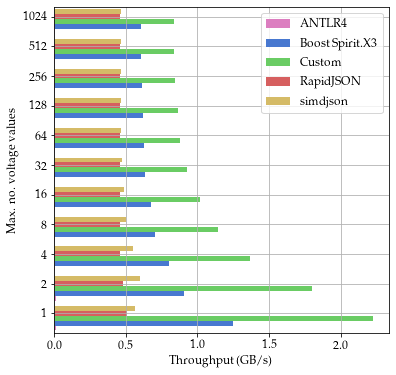

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. no. voltage values")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)

fig.savefig('software.pdf')